# 0. Reading in Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_paths = {'in':'../data/converted/Ride_to_alum_creek.csv',
              'out':'../data/enriched/Ride_to_alum_creek.csv'
             }

df = pd.read_csv(file_paths['in'])

### Convert `time` to a Datetime

In [3]:
df['time'].dtype # starts as a string object

dtype('O')

In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:
df['time'].dtype # now a datetime object

datetime64[ns, UTC]

# 1. Investigating `time`

In [6]:
# test the conversion of a timestamp to a UTC timestamp in seconds since 1970
df.loc[0,'time'].timestamp()

1594552501.0

In [7]:
# convert the timestamps to seconds for easier comparison
df['time_utc'] = df['time'].apply(lambda x: x.timestamp())

In [8]:
# create a time difference column that shows the number of seconds between successive rows
df['time_diff'] = df['time_utc'].diff()

In [9]:
df[['time','time_utc','time_diff']].head(10)

,time,time_utc,time_diff
0,2020-07-12 11:15:01+00:00,1.594553e+09,NaN
1,2020-07-12 11:15:02+00:00,1.594553e+09,1.0
2,2020-07-12 11:15:04+00:00,1.594553e+09,2.0
3,2020-07-12 11:15:05+00:00,1.594553e+09,1.0
4,2020-07-12 11:15:07+00:00,1.594553e+09,2.0
5,2020-07-12 11:15:09+00:00,1.594553e+09,2.0
6,2020-07-12 11:15:10+00:00,1.594553e+09,1.0
7,2020-07-12 11:15:12+00:00,1.594553e+09,2.0
8,2020-07-12 11:15:13+00:00,1.594553e+09,1.0
9,2020-07-12 11:15:14+00:00,1.594553e+09,1.0


In [10]:
df['time_diff'].value_counts()

2.0      4670
1.0      4053
3.0         5
9.0         5
5.0         4
6.0         3
4.0         3
10.0        2
36.0        2
417.0       1
249.0       1
152.0       1
90.0        1
8.0         1
20.0        1
42.0        1
18.0        1
12.0        1
19.0        1
61.0        1
588.0       1
51.0        1
25.0        1
30.0        1
72.0        1
0.0         1
128.0       1
45.0        1
764.0       1
118.0       1
137.0       1
44.0        1
Name: time_diff, dtype: int64

In [13]:
# create an elapsed time column
df['elapsed_time'] = df['time_diff'].cumsum()

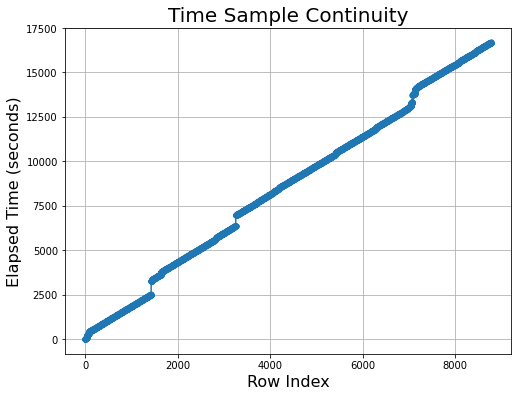

In [32]:
# visualize the jumps of cumulative time 
fig = plt.figure(figsize=(8,6))

_ = plt.plot(df['elapsed_time'], linestyle='-', marker='.', markersize=10)
_ = plt.xlabel('Row Index', fontsize=16)
_ = plt.ylabel('Elapsed Time (seconds)', fontsize=16)
_ = plt.title('Time Sample Continuity', fontsize=20)
_ = plt.grid()

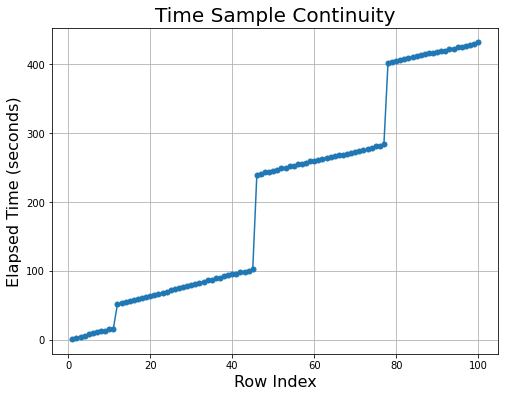

In [31]:
# visualize the jumps of cumulative time 
fig = plt.figure(figsize=(8,6))

_ = plt.plot(df.loc[0:100, 'elapsed_time'], linestyle='-', marker='.', markersize=10)
_ = plt.xlabel('Row Index', fontsize=16)
_ = plt.ylabel('Elapsed Time (seconds)', fontsize=16)
_ = plt.title('Time Sample Continuity', fontsize=20)
_ = plt.grid()

# 2. Saving the Enrichments

In [11]:
df.to_csv(file_paths['out'], index=False)